In [4]:
import os
import h5py

import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import backend
from keras import optimizers
from keras import regularizers

%matplotlib inline

# Giving memory to load the model

In [5]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
nb_classes = 20
class_name = {
    0: 'ant_man',
    1: 'aquaman',
    2: 'batman',
    3: 'black_widow',
    4: 'captain_america',
    5: 'deadpool',
    6: 'deathstroke',
    7: 'doctor_manhattan',
    8: 'flash',
    9: 'green_arrow',
    10: 'green_lantern',
    11: 'hawkeye',
    12: 'hawkgirl',
    13: 'hulk',
    14: 'ironman',
    15: 'spiderman',
    16: 'superman',
    17: 'thor',
    18: 'wolverine',
    19: 'wonder_woman'
}

In [7]:
img_width, img_height = 200, 200

train_data_dir = r'superheroes'
validation_data_dir = r'validate'
nb_train_samples = 10000
nb_validation_samples = 1000
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=8,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=8,
        class_mode='categorical')
#One hot encoding
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

Found 7930 images belonging to 20 classes.
Found 494 images belonging to 20 classes.


# Load model

In [8]:
tf_model2 = load_model('./models/proj_not_to_freeze.hdf5')

# Template function to display images

In [9]:
def show_sample(X, y, prediction=-1):
    im = X
    plt.imshow(im)
    if prediction >= 0:
        plt.title("Class = %s, Predict = %s" % (class_name[y], class_name[prediction]))
    else:
        plt.title("Class = %s" % (class_name[y]))

    plt.axis('on')
    plt.show()
print("well")

well


# Showing some correct predictions

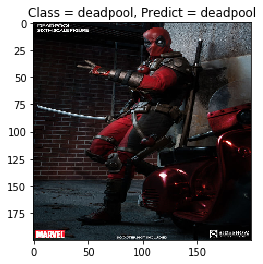

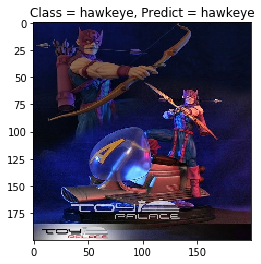

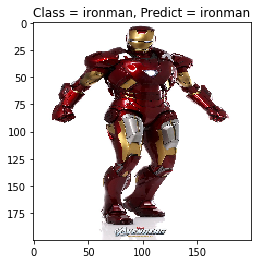

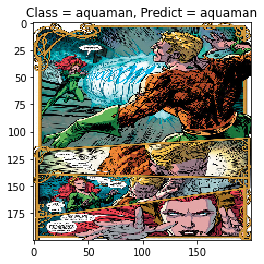

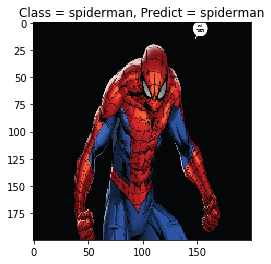

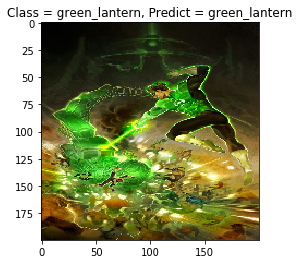

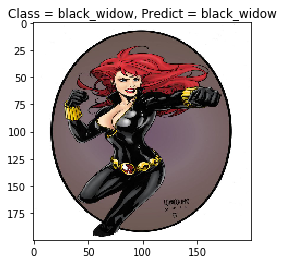

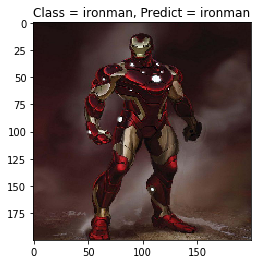

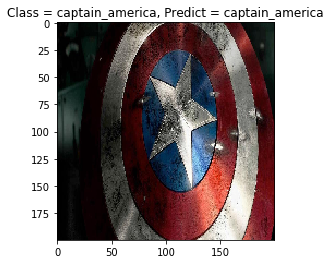

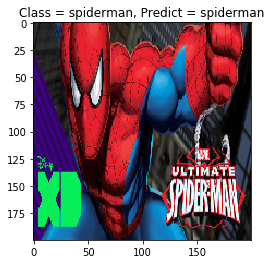

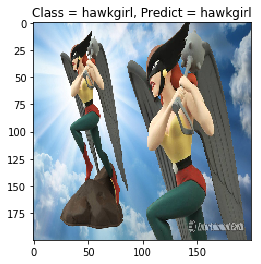

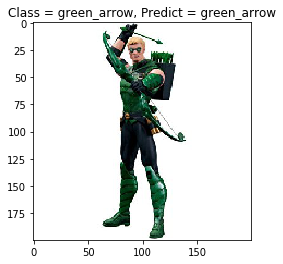

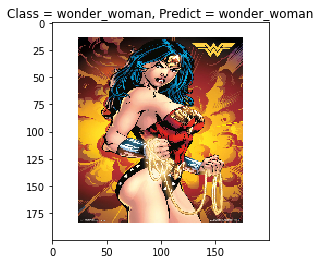

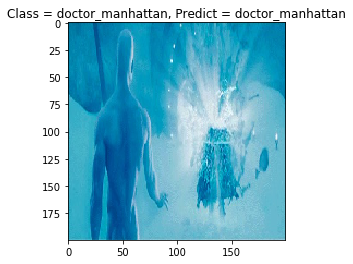

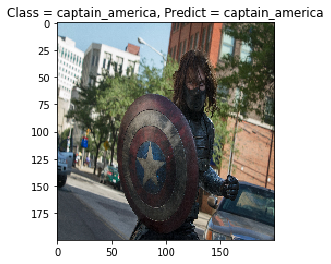

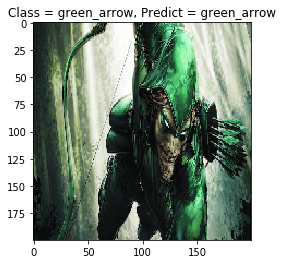

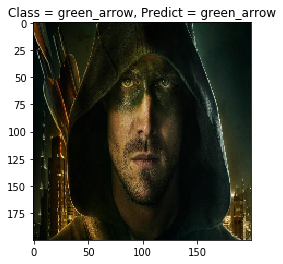

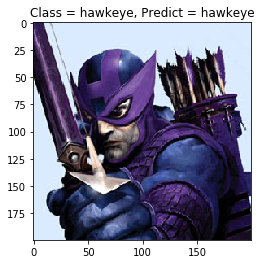

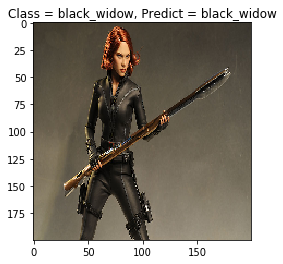

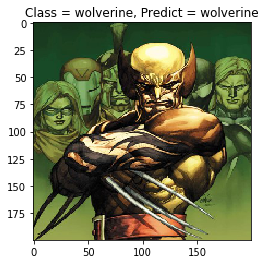

In [10]:
mistakes = 0

while mistakes<20:
    for X_batch, Y_batch in validation_generator:
        #print(Y_batch)
        preds = tf_model2.predict_classes(X_batch,batch_size=32,verbose=0)
        for i in range(len(Y_batch)):
            my_pred = np.argmax(Y_batch[i])
            #print (my_pred,preds[i])
            if my_pred==preds[i]:
                mistakes+=1
                if mistakes>20:
                    break
                #print(Y_batch[i])
                show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]),prediction = preds[i])
        if mistakes>20:
                break

# Function to visualize the output of CNN layers

In [11]:
from keras import backend as K
def get_activations(model, layer, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()], [model.layers[layer].output,])
    activations = get_activations([X_batch,0])
    return activations

We make a gif of a the convolutional layers for visualization. We plot each image for convenience

(1, 8, 200, 200, 64)
(224, 224, 3)


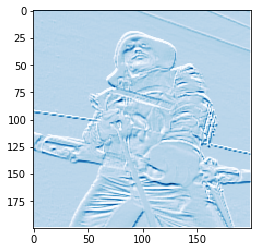

(1, 8, 202, 202, 64)
(224, 224, 3)


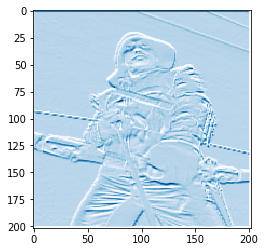

(1, 8, 200, 200, 64)
(224, 224, 3)


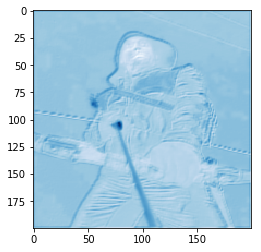

(1, 8, 100, 100, 64)
(224, 224, 3)


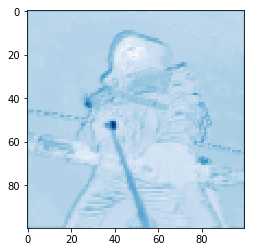

(1, 8, 102, 102, 64)
(224, 224, 3)


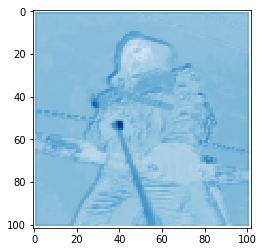

(1, 8, 100, 100, 128)
(224, 224, 3)


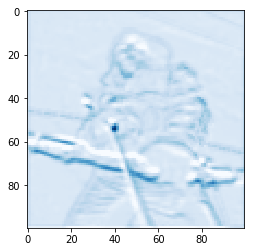

/usr/local/lib/python3.4/dist-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float32 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


In [24]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import PIL
from PIL import Image
mistakes = 0
images = []
import scipy
def to_rgb2(im):
    # as 1, but we use broadcasting in one line
    w, h = im.shape
    ret = np.empty((w, h, 3), dtype=np.uint8)
    ret[:, :, :] = im[:, :, np.newaxis]
    return ret
while mistakes<1:
    for X_batch, Y_batch in validation_generator:
        #print(Y_batch)
        preds = tf_model2.predict_classes(X_batch,batch_size=32,verbose=0)
        for i in range(7):
            images.append(X_batch[1])
        for i in range(len(tf_model2.layers)-26):
            activations = np.array(get_activations(tf_model2,i+1,X_batch))
            print(activations.shape)
            img = scipy.misc.imresize(activations[0,1,:,:,3],(224,224,3))
            img = to_rgb2(img)
            print(img.shape)
            for i in range(7):
                images.append(img)
            plt.imshow(activations[0,1,:,:,3],cm.Blues)
            plt.show()
        imageio.mimsave('movie.gif', images)
        for i in range(len(Y_batch)):
            my_pred = np.argmax(Y_batch[i])
            #print (my_pred,preds[i])
            if my_pred==preds[i]:
                mistakes+=1
                if mistakes>1:
                    break
                #print(Y_batch[i])
                #show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]),prediction = preds[i])
        if mistakes>1:
                break

In [13]:
print(tf_model2.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_14 (ZeroPadding2D) (None, 202, 202, 3)   0           zeropadding2d_input_2[0][0]      
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 200, 200, 64)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 202, 202, 64)  0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 200, 200, 64)  36928       zeropadding2d_15[0][0]           
___________________________________________________________________________________________

# Some fun images

In [14]:
from IPython.display import Image
Image(url="movie10.gif")

In [15]:
from IPython.display import Image
Image(url="movie11.gif")

In [16]:
from IPython.display import Image
Image(url="movie12.gif")

# See model structure

In [17]:
from keras.utils.visualize_util import plot
plot(tf_model2, to_file='model.png')

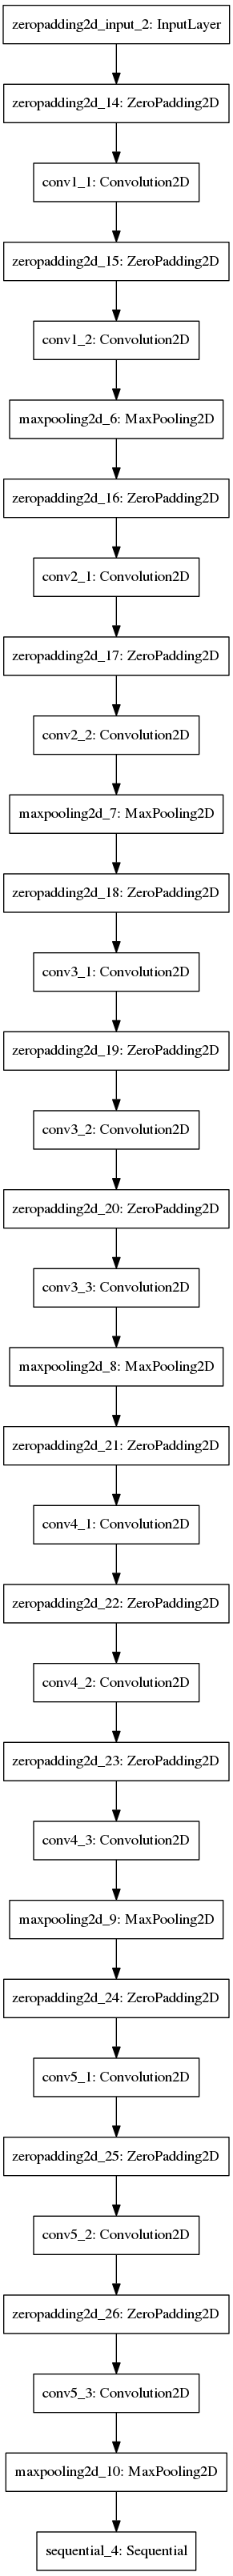

In [18]:
from IPython.display import Image
Image(filename="model.png")

# Making a confusion matrix

In [19]:
total = 0
y_actual = []
y_predicted = []
while total<1000:
    for X_batch, Y_batch in validation_generator:
        #print(Y_batch)
        preds = tf_model2.predict_classes(X_batch,batch_size=32,verbose=0)
        for i in range(len(Y_batch)):
            my_pred = np.argmax(Y_batch[i])
            y_actual.append(preds[i])
            y_predicted.append(my_pred)
            #print (my_pred,preds[i])
            
            total+=1
            if total>1000:
                break
                #print(Y_batch[i])
                #show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]),prediction = preds[i])
        if total>1000:
                break

/usr/local/lib/python3.4/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


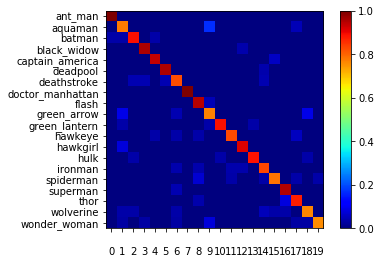

In [20]:
from sklearn.metrics import confusion_matrix
conf_arr = confusion_matrix(y_actual,y_predicted)
%matplotlib inline
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape
cb = fig.colorbar(res)
alphabet = list(class_name.values())
alphabet2 = list(class_name.keys())
ax.tick_params(axis='x', which='major', pad=15)
plt.xticks(range(width), alphabet2[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.jpg', format='jpg')

In [21]:
print(width,height)

20 20


# Some mistakes

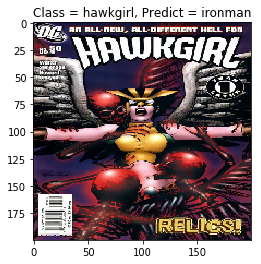

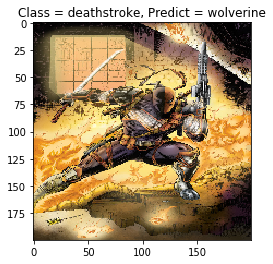

/usr/local/lib/python3.4/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


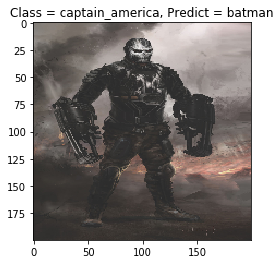

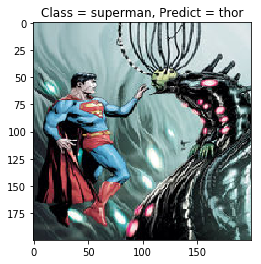

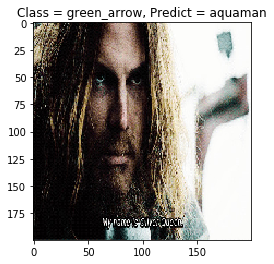

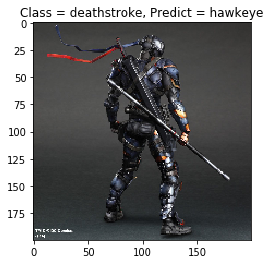

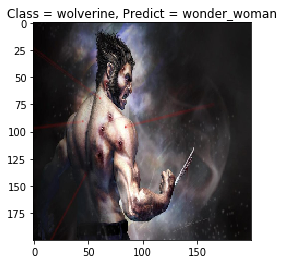

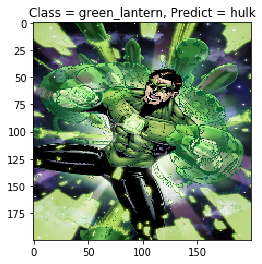

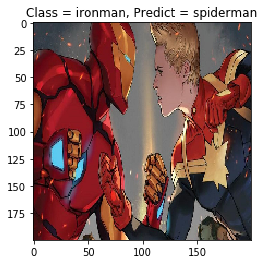

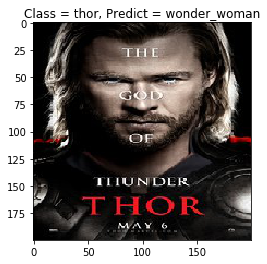

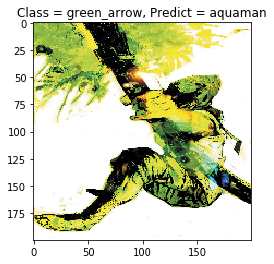

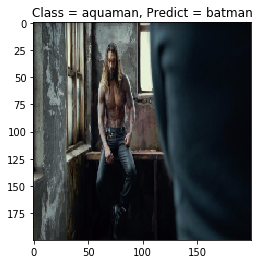

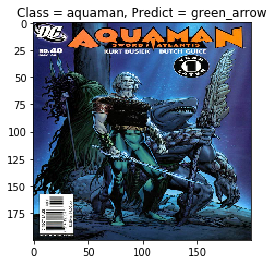

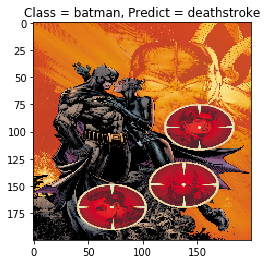

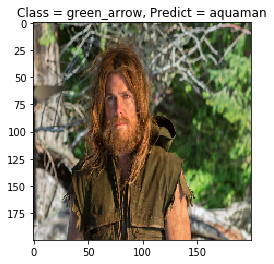

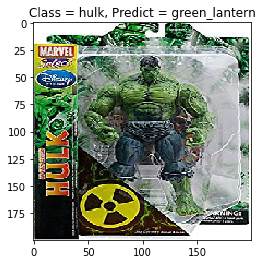

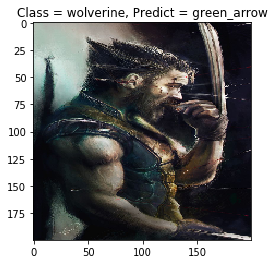

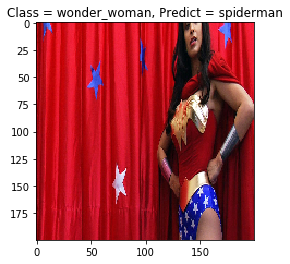

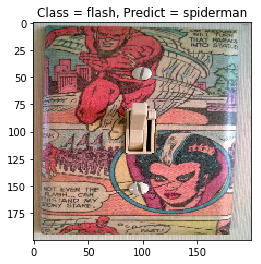

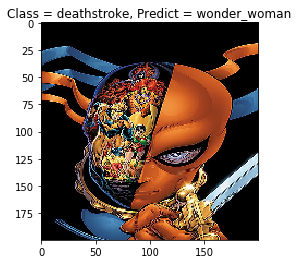

In [22]:
mistakes = 0

while mistakes<20:
    for X_batch, Y_batch in validation_generator:
        #print(Y_batch)
        preds = tf_model2.predict_classes(X_batch,batch_size=32,verbose=0)
        for i in range(len(Y_batch)):
            my_pred = np.argmax(Y_batch[i])
            #print (my_pred,preds[i])
            if my_pred!=preds[i]:
                mistakes+=1
                if mistakes>20:
                    break
                #print(Y_batch[i])
                show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]),prediction = preds[i])
        if mistakes>20:
                break

# The end